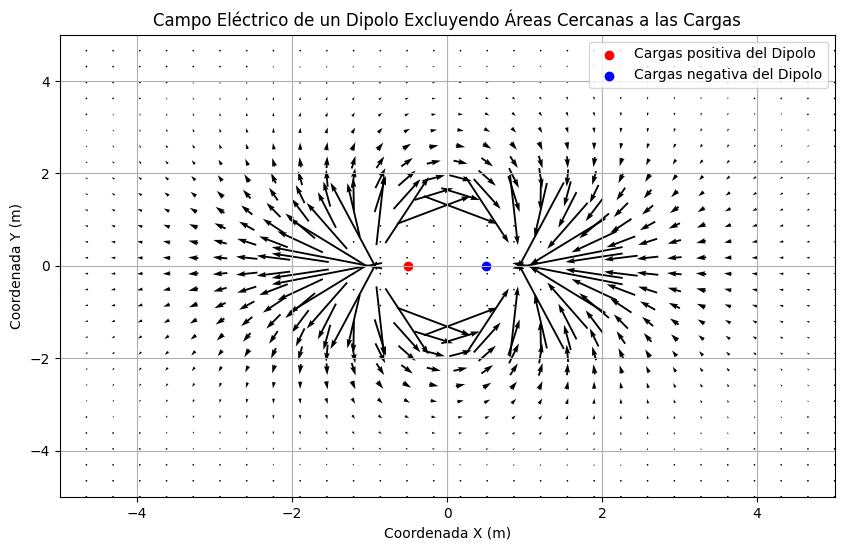

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de constantes
k = 8.99e9  # Constante de Coulomb en unidades SI (N m^2 / C^2)
q1 = 1e-9   # Carga del primer polo del dipolo (en Coulombs)
q2 = -1e-9  # Carga del segundo polo del dipolo (en Coulombs)
d = 1.0     # Separación entre los polos del dipolo (en metros)

# Definición de las posiciones de las cargas
x1, y1 = -d/2, 0  # Posición del primer polo
x2, y2 = d/2, 0   # Posición del segundo polo

# Definición de un dominio espacial
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)

# Crear una máscara para omitir puntos cercanos a las cargas
dist1 = np.sqrt((X - x1)**2 + (Y - y1)**2)  # Distancia al primer polo
dist2 = np.sqrt((X - x2)**2 + (Y - y2)**2)  # Distancia al segundo polo
mask = (dist1 > 1) & (dist2 > 1)  # Puntos a incluir en el cálculo

# Inicializa los campos eléctricos Ex y Ey a cero
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

# Calcula el campo eléctrico en cada punto del dominio excluyendo áreas cercanas a las cargas
for i in range(len(x)):
    for j in range(len(y)):
        if mask[i, j]:
            r1 = dist1[i, j]
            r2 = dist2[i, j]
            Ex[i, j] = k * (q1 / r1**3) * (X[i, j] - x1) + k * (q2 / r2**3) * (X[i, j] - x2)
            Ey[i, j] = k * (q1 / r1**3) * (Y[i, j] - y1) + k * (q2 / r2**3) * (Y[i, j] - y2)

# Crea una representación gráfica del campo eléctrico
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, Ex, Ey, scale= 40, pivot='mid')
plt.scatter(x1, y1, color='red', marker='o', label='Cargas positiva del Dipolo')
plt.scatter(x2, y2, color='blue', marker='o', label='Cargas negativa del Dipolo')
plt.title('Campo Eléctrico de un Dipolo Excluyendo Áreas Cercanas a las Cargas')
plt.xlabel('Coordenada X (m)')
plt.ylabel('Coordenada Y (m)')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()